# Mount Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installation

In [19]:
# !pip install scikit_optimize
# !pip install lightgbm
# !pip install auto-sklearn 


use kaleido to show plotly as image

In [20]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Imports

In [21]:
import numpy as np 
import pandas as pd 
import os
from os import listdir, getcwd, system
import datetime
import time
import timeit
from math import sqrt 
import pickle
import gc
import json

import joblib
# skopt.space.space

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from Dash_converter import checkpoint, experiment

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFwe, f_regression, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit

# # text mining
# import nltk
# nltk.download('all-corpora', 'punkt', 'stopwords') # NLP - Download 'all-corpora' and 'punkt' from nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re, string
# from sklearn.feature_extraction.text import TfidfVectorizer

# decomposition
from sklearn.decomposition import PCA

# Models
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm

from sklearn.preprocessing import StandardScaler  #minmaxscaler (image data - here not known) #maxscaler
from sklearn.linear_model import MultiTaskLasso, PassiveAggressiveClassifier, LogisticRegression, SGDClassifier, Perceptron, LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, classification_report, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, make_scorer, accuracy_score, confusion_matrix, average_precision_score, f1_score, precision_score, recall_score 

# from lightgbm import LGBMRegressor
# from xgboost.sklearn import XGBRegressor
# from catboost import CatBoostRegressor

# import lightgbm as lgb
# import xgboost as xgb
# import catboost as ctb


# deeplearning
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import InceptionResNetV2, Xception, MobileNetV2, NASNetMobile, InceptionV3, EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow import keras

from keras import optimizers
from keras.models import Model, Sequential, load_model
from keras.applications import vgg16



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Input, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


# image
from PIL import Image
import PIL
import matplotlib.image as mpimgC
from PIL import Image
import PIL
from skimage.io import imread, imshow
from skimage import io
import cv2 as cv
import kaleido

# Hyperparameter tuning
# from functools import partial
# from skopt.searchcv import BayesSearchCV
# from skopt import space 
# from skopt.space import Integer, Real, Categorical 
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# import autosklearn.regression
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL

#dropdown
import ipywidgets as widgets
import IPython
from IPython.display import Image
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual

import holidays

# To see multiple outputs from a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 20) 

# Setup
import warnings
warnings.filterwarnings('ignore')


In [22]:
def save_obj(obj, path, name):
    with open(path +"/"+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path, name):
    with open(path +"/"+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [23]:
def showPlotlyAsImage(fig):
  img_bytes = fig.to_image(format="png", width=1200, height=300, scale=2)
  display(Image(img_bytes))

In [24]:
gc.collect()
tf.keras.backend.clear_session()

In [25]:
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)

In [26]:
os.listdir()

['.config', '=4.0.0', 'drive', 'sample_data']

## check runtime (gpu)

In [27]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [28]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [29]:
tf.config.list_physical_devices('GPU')

[]

In [30]:
# tf.test.is_gpu_available()

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1466636723409725001
xla_global_id: -1
]


### Variables


In [32]:
# #@title String fields (change this to train the model with all the data and to save it)

# PExperimentName = 'MobileNetV2_v1_submission' #@param {type:"string"}
# PFULL_RUN = False #@param ["False", "True"] {type:"raw"}
# PSAVE_Model = False #@param ["False", "True"] {type:"raw"}

In [33]:
folder_OR2 = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II'
folder_OR2_data = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/data'
folder_OR2_models = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models'

# Read the dataset


In [34]:
df = pd.read_excel(os.path.join(folder_OR2_data,'online_retail_II.xlsx'))

In [35]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [36]:
df.columns = ['Invoice', 'StockCode', 'Description', 'OrderQuantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country']

# Feature Engineering

In [37]:
df['Revenue'] = df['OrderQuantity']*df['Price']

In [38]:
type(df['InvoiceDate'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
df.head()

,Invoice,StockCode,Description,OrderQuantity,InvoiceDate,Price,CustomerID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [40]:
len(df)

525461

# Preprocessing (Messy data)

## remove nan

In [41]:
len_before_nan_removal = len(df)
df = df.dropna()
len_bafter_nan_removal = len(df)
print("Before: ",len_before_nan_removal, " After: " , len_bafter_nan_removal, " ", 1-(len_bafter_nan_removal/len_before_nan_removal), "%")

Before:  525461  After:  417534   0.20539488182757615 %


## Transform customer into int (no double)

In [42]:
display(np.unique(df['CustomerID']))
# they are all int
df.CustomerID = df.CustomerID.astype(int)

array([12346., 12347., 12348., ..., 18285., 18286., 18287.])

In [43]:
display(np.unique(df['CustomerID']))

array([12346, 12347, 12348, ..., 18285, 18286, 18287])

## Identify returns

In [44]:
def checkReturn(quantity):
  if quantity < 0:
    return True
  else:
    return False 

In [45]:
df['ReturnBoolean'] = [checkReturn(quantity) for quantity in df['OrderQuantity']]

## Remove returns

In [46]:
display(df.query("Revenue < 0"))
len(df.query("Revenue < 0")) / len(df) #(~20%)

,Invoice,StockCode,Description,OrderQuantity,InvoiceDate,Price,CustomerID,Country,Revenue,ReturnBoolean
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40,True
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.90,True
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00,True
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.60,True
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40,True
...,...,...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605,Germany,-4.20,True
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329,United Kingdom,-2.00,True
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329,United Kingdom,-2.95,True
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329,United Kingdom,-12.75,True


0.023564548036806583

In [47]:
# remove orders with returns
df.query("CustomerID == 16321").sort_values("InvoiceDate")

,Invoice,StockCode,Description,OrderQuantity,InvoiceDate,Price,CustomerID,Country,Revenue,ReturnBoolean
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.4,True
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.9,True
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.0,True
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.6,True
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.4,True
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.0,True
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.0,True
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321,Australia,-20.4,True
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.4,True
195,489450,22090,PAPER BUNTING RETRO SPOTS,12,2009-12-01 10:36:00,2.95,16321,Australia,35.4,False


In [48]:
# remove orders with returns
df.query("CustomerID == 12605").sort_values("InvoiceDate")

,Invoice,StockCode,Description,OrderQuantity,InvoiceDate,Price,CustomerID,Country,Revenue,ReturnBoolean
330709,521661,22554,PLASTERS IN TIN WOODLAND ANIMALS,24,2010-09-07 14:21:00,1.65,12605,Germany,39.60,False
330721,521661,22551,PLASTERS IN TIN SPACEBOY,12,2010-09-07 14:21:00,1.65,12605,Germany,19.80,False
330720,521661,22380,TOY TIDY SPACEBOY,5,2010-09-07 14:21:00,2.10,12605,Germany,10.50,False
330719,521661,22555,PLASTERS IN TIN STRONGMAN,12,2010-09-07 14:21:00,1.65,12605,Germany,19.80,False
330718,521661,21544,SKULLS WATER TRANSFER TATTOOS,12,2010-09-07 14:21:00,0.85,12605,Germany,10.20,False
...,...,...,...,...,...,...,...,...,...,...
495565,535789,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-11-28 14:18:00,0.85,12605,Germany,10.20,False
495558,535789,22714,CARD BIRTHDAY COWBOY,12,2010-11-28 14:18:00,0.42,12605,Germany,5.04,False
524694,C538123,22333,RETROSPOT PARTY BAG + STICKER SET,-1,2010-12-09 15:41:00,1.65,12605,Germany,-1.65,True
524693,C538123,22331,WOODLAND PARTY BAG + STICKER SET,-1,2010-12-09 15:41:00,1.65,12605,Germany,-1.65,True


In [49]:
df_no_return = df.query("OrderQuantity > 0").sort_values("InvoiceDate")
print("Before: ", len(df), " After: " , len(df_no_return), " ", 1-(len(df_no_return)/len(df)), "%")

Before:  417534  After:  407695   0.023564548036806632 %


## Feature extraction 

### Customer amount

In [50]:
df['CustomerAmount'] = 1
# df['InvoiceAmount'] = 1 # it is the same

### Country OneHot

In [51]:
df_country_OHE =  pd.get_dummies(df.Country)
df_country_OHE_column = df_country_OHE.columns
df_country_OHE_column = "Country_"+df_country_OHE_column
df_country_OHE.columns = df_country_OHE_column


In [52]:
df_country_OHE

,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Denmark,Country_EIRE,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
525457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
525458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
525459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
df = pd.concat([df, df_country_OHE], axis=1)

In [54]:
df

,Invoice,StockCode,Description,OrderQuantity,InvoiceDate,Price,CustomerID,Country,Revenue,ReturnBoolean,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,False,...,0,0,0,0,0,0,0,1,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,False,...,0,0,0,0,0,0,0,1,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,False,...,0,0,0,0,0,0,0,1,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,False,...,0,0,0,0,0,0,0,1,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,False,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,False,...,0,0,0,0,0,0,0,1,0,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,False,...,0,0,0,0,0,0,0,1,0,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,False,...,0,0,0,0,0,0,0,1,0,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,False,...,0,0,0,0,0,0,0,1,0,0


# First look into the dataset

## Grouping

### Country

In [55]:
df_sum_Country = df.groupby("Country").sum()
df_sum_Country = df_sum_Country.reset_index(drop=False)
display(df_sum_Country)

,Country,OrderQuantity,Price,CustomerID,Revenue,ReturnBoolean,CustomerAmount,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,Australia,20053,4056.320,8195678,30051.800,24,654,654.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austria,6479,2482.800,6703495,13023.280,13,537,0.0,537.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bahrain,495,91.560,518870,805.970,0,42,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Belgium,11980,7226.750,13155343,22663.530,16,1054,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,189,113.710,790562,268.270,0,62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,USA,2666,1110.900,3091099,4555.620,14,244,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0
33,United Arab Emirates,4739,1168.700,4787666,7169.430,3,318,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,318.0,0.0,0.0,0.0
34,United Kingdom,4344969,1386126.613,5903797481,7038549.633,8472,379423,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379423.0,0.0,0.0
35,Unspecified,3314,2129.950,4298098,4709.690,3,280,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0,0.0


In [56]:
df_mean_Country = df.groupby("Country").mean()
df_mean_Country = df_mean_Country.reset_index(drop=False)

### CustomerID

In [57]:
print(np.unique(df.CustomerID))
len(np.unique(df.CustomerID))

[12346 12347 12348 ... 18285 18286 18287]


4383

In [58]:
df_sum_CustomerID = df.groupby("CustomerID").sum()
df_sum_CustomerID = df_sum_CustomerID.reset_index(drop=False)

In [59]:
df_mean_CustomerID = df.groupby("CustomerID").mean()
df_mean_CustomerID = df_mean_CustomerID.reset_index(drop=False)

## Visualizations

Which countries ordered the most

In [60]:
fig = px.bar(df_sum_Country.sort_values("OrderQuantity", ascending=False), x="Country", y="OrderQuantity", log_y=True , title="OrderQuantity by country")
fig.show()

Which countries have the highest revenue

In [61]:
fig = px.bar(df_sum_Country.sort_values("Revenue", ascending=False), x="Country", y="Revenue", log_y=True, title="Revenue by country")
fig.show()

Which customer ordered the most

In [62]:
len(df_sum_CustomerID)

4383

In [63]:
df_sum_CustomerID_sorted_quantity = df_sum_CustomerID.sort_values("OrderQuantity", ascending=False)
df_sum_CustomerID_sorted_quantity = df_sum_CustomerID_sorted_quantity.reset_index(drop=False)
df_sum_CustomerID_sorted_quantity = df_sum_CustomerID_sorted_quantity.reset_index(drop=False)

In [64]:
fig = px.bar(df_sum_CustomerID_sorted_quantity, x="level_0", y="OrderQuantity", hover_data=['CustomerID'] ,log_y=True , title="OrderQuantity by Customer")
fig.update_traces(marker_color='black')
fig.show()

In [65]:
fig = px.bar(df_sum_CustomerID_sorted_quantity[:500], x="level_0", y="OrderQuantity", hover_data=['CustomerID'], title="OrderQuantity by top Customer")
fig.update_traces(marker_color='black')
fig.show()

In [66]:
fig = px.bar(df_sum_CustomerID_sorted_quantity[-500:], x="level_0", y="OrderQuantity",hover_data=['CustomerID'], title="OrderQuantity by lowest Customer")
fig.update_traces(marker_color='black')
fig.show()

Which customer have the most revenue

In [67]:
df_sum_CustomerID_sorted_revenue = df_sum_CustomerID.sort_values("Revenue", ascending=False)
df_sum_CustomerID_sorted_revenue = df_sum_CustomerID_sorted_revenue.reset_index(drop=False)
df_sum_CustomerID_sorted_revenue = df_sum_CustomerID_sorted_revenue.reset_index(drop=False)

In [68]:
fig = px.bar(df_sum_CustomerID_sorted_revenue, x="level_0", y="Revenue", hover_data=['CustomerID'] ,log_y=True , title="Revenue by Customer")
fig.update_traces(marker_color='black')
fig.show()

In [69]:
fig = px.bar(df_sum_CustomerID_sorted_revenue[:500], x="level_0", y="Revenue", hover_data=['CustomerID'], title="Revenue by top Customer")
fig.update_traces(marker_color='black')
fig.show()

In [70]:
fig = px.bar(df_sum_CustomerID_sorted_revenue[-500:], x="level_0", y="Revenue", hover_data=['CustomerID'] , title="Revenue by top Customer")
fig.update_traces(marker_color='black')
fig.show()

### Time series

Group Orders by time

In [71]:
df_gr_m = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='M')).sum()
df_gr_m = df_gr_m.reset_index(drop=False)
df_gr_m

fig = px.line(df_gr_m, x="InvoiceDate", y="Revenue",
         title = "Revenue per month" ) #line_shape="spline", render_mode="svg",
fig.show()

In [72]:
df_gr_day = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='D')).sum()
df_gr_day = df_gr_day.reset_index(drop=False)
df_gr_day

fig = px.line(df_gr_day, x="InvoiceDate", y="Revenue",
         title = "Revenue per day" )
fig.show()

In [73]:
df_gr_hour = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='H')).sum()
df_gr_hour = df_gr_hour.reset_index(drop=False)
df_gr_hour

fig = px.line(df_gr_hour, x="InvoiceDate", y="Revenue",
         title = "Revenue per hour (this will be taken)" )
fig.show()

In [74]:
df_gr_30min = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='30min')).sum()
df_gr_30min = df_gr_30min.reset_index(drop=False)
df_gr_30min

fig = px.line(df_gr_30min, x="InvoiceDate", y="Revenue",
         title = "Revenue 30 min" )
fig.show()

In [75]:
df_gr_10min = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='10min')).sum()
df_gr_10min = df_gr_10min.reset_index(drop=False)
df_gr_10min

fig = px.line(df_gr_10min, x="InvoiceDate", y="Revenue",
        title = "Revenue per 10 minutes" )
fig.show()

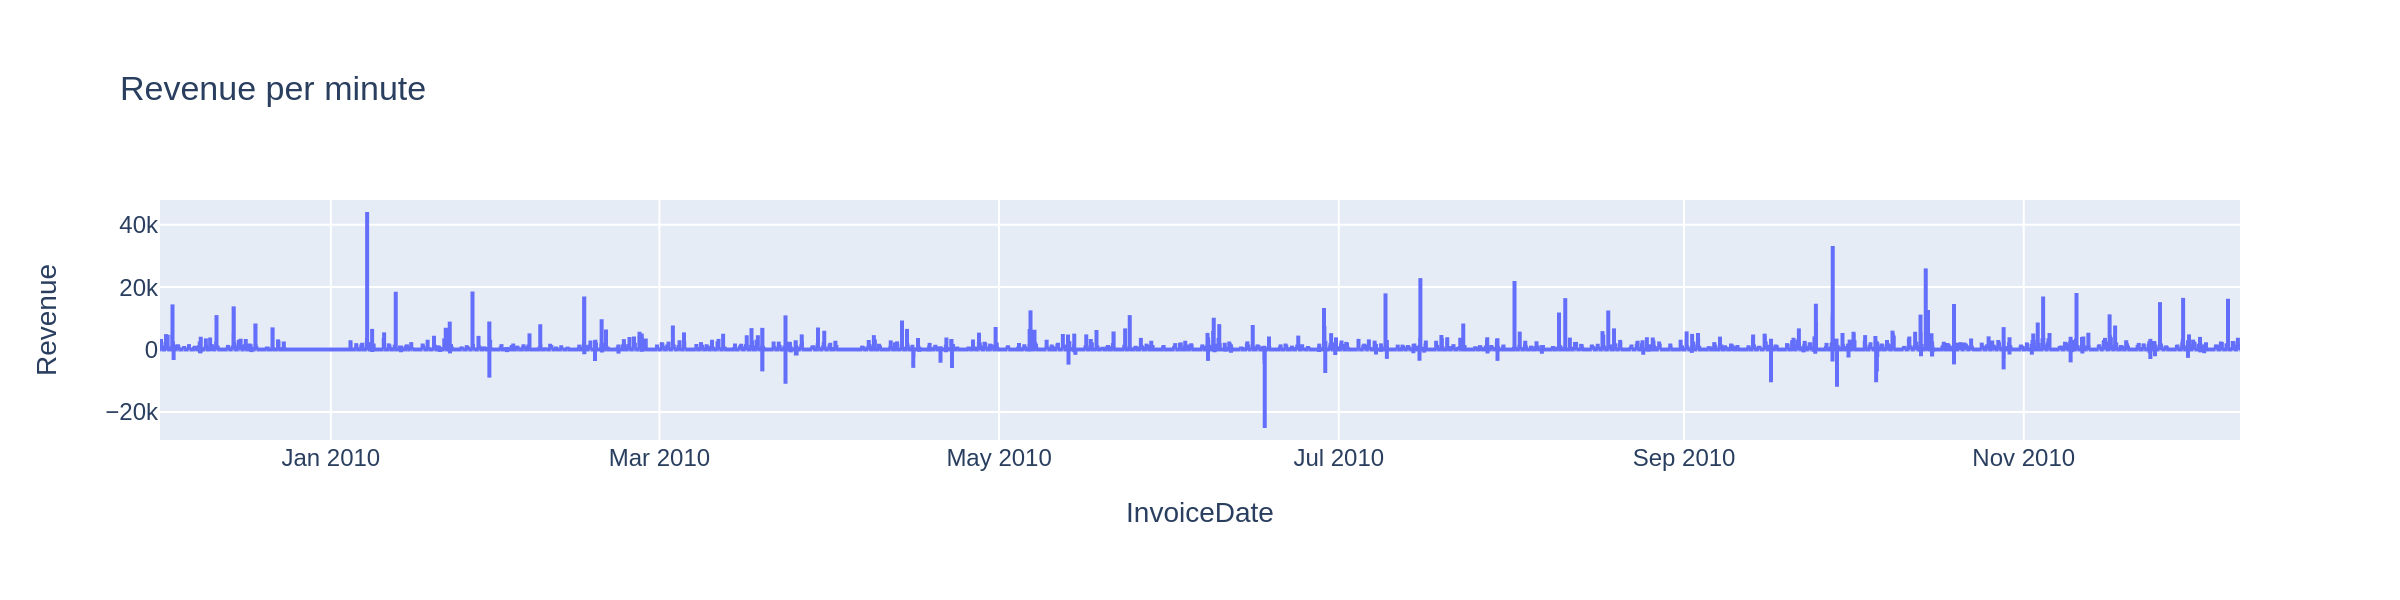

In [76]:
df_gr_1min = df.groupby(pd.Grouper(key='InvoiceDate', axis=0, freq='1min')).sum()
df_gr_1min = df_gr_1min.reset_index(drop=False)
df_gr_1min

fig = px.line(df_gr_1min, x="InvoiceDate", y="Revenue",
         title = "Revenue per minute" )
showPlotlyAsImage(fig)

country included

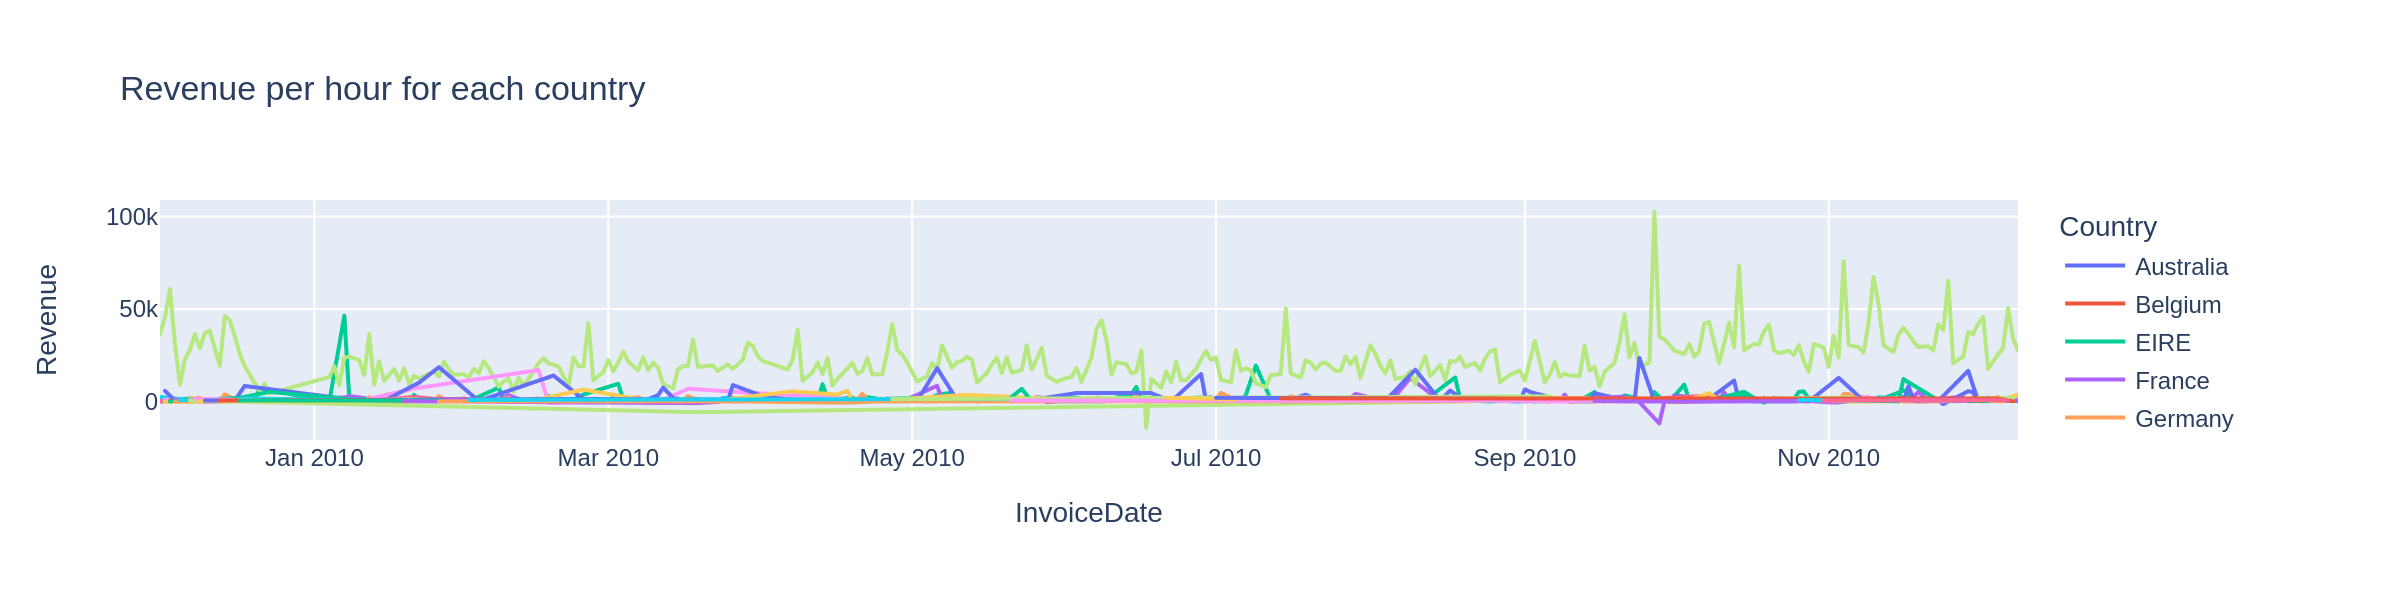

In [77]:
df_gr_hour_country = df.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq='D'),pd.Grouper(key='Country')]).sum()
df_gr_hour_country = df_gr_hour_country.reset_index(drop=False)
df_gr_hour_country

fig = px.line(df_gr_hour_country, x="InvoiceDate", color='Country', y="Revenue",
         title = "Revenue per hour for each country" )
showPlotlyAsImage(fig)

# Revenue dropdown

In [78]:
selectable_Timerange = ['M',"W","D","12h", "6h", '3h','2h' ,"H","30min","10min","1min"]

In [79]:
def showDistribution(selectedTimeRange,interactive, smoothing):
  print(selectedTimeRange,interactive)
  df_grouper = df.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq=str(selectedTimeRange))]).sum()
  df_grouper = df_grouper.reset_index(drop=False)
  df_grouper

  if smoothing:
    fig = px.line(df_grouper, x="InvoiceDate", y="Revenue",
            line_shape="spline", render_mode="svg", title = "Revenue per {}".format(selectedTimeRange) )
  else:
    fig = px.line(df_grouper, x="InvoiceDate", y="Revenue",
            title = "Revenue per {}".format(selectedTimeRange) )
  
  
  if interactive:
    fig.show()
  else:
    showPlotlyAsImage(fig)

interact(showDistribution, 
  selectedTimeRange = widgets.Dropdown(
    options=selectable_Timerange,
    value = 'D' ,
  ),
  interactive = widgets.Dropdown(
    options=[True, False],
    value =True ,
  ),
  smoothing = widgets.Dropdown(
    options=[True, False],
    value =False ,
  )
  
)

interactive(children=(Dropdown(description='selectedTimeRange', index=2, options=('M', 'W', 'D', '12h', '6h', …

<function __main__.showDistribution>

# Order Quantity Dashboard

In [80]:
def showDistribution(selectedTimeRange,interactive, smoothing):
  print(selectedTimeRange,interactive)
  df_grouper = df.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq=str(selectedTimeRange))]).sum()
  df_grouper = df_grouper.reset_index(drop=False)
  df_grouper

  if smoothing:
    fig = px.line(df_grouper, x="InvoiceDate", y="OrderQuantity",
            line_shape="spline", render_mode="svg", title = "Revenue per {}".format(selectedTimeRange) )
  else:
    fig = px.line(df_grouper, x="InvoiceDate", y="OrderQuantity",
            title = "Revenue per {}".format(selectedTimeRange) )
  
  
  if interactive:
    fig.show()
  else:
    showPlotlyAsImage(fig)

interact(showDistribution, 
  selectedTimeRange = widgets.Dropdown(
    options=selectable_Timerange,
    value = 'D' ,
  ),
  interactive = widgets.Dropdown(
    options=[True, False],
    value =True ,
  ),
  smoothing = widgets.Dropdown(
    options=[True, False],
    value =False ,
  )
  
)

interactive(children=(Dropdown(description='selectedTimeRange', index=2, options=('M', 'W', 'D', '12h', '6h', …

<function __main__.showDistribution>

# Order Quantity Dashboard - Select products

In [81]:
np.unique(df['Description'])

array(['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT',
       ' 4 PURPLE FLOCK DINNER CANDLES', ..., 'ZINC POLICE BOX LANTERN',
       'ZINC TOP  2 DOOR WOODEN SHELF ',
       'ZINC WILLIE WINKIE  CANDLE STICK'], dtype=object)

In [82]:
len(np.unique(df['Description']))

4459

In [83]:
product_list = np.unique(df['Description'])

In [84]:
np.unique(list(df['StockCode']))

array(['10002', '10080', '10109', ..., 'SP1002', 'TEST001', 'TEST002'],
      dtype='<U21')

In [85]:
len(np.unique(list(df['StockCode'])))

4031

In [86]:
df[['Description','StockCode']].drop_duplicates()

,Description,StockCode
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,85048
1,PINK CHERRY LIGHTS,79323P
2,WHITE CHERRY LIGHTS,79323W
3,"RECORD FRAME 7"" SINGLE SIZE",22041
4,STRAWBERRY CERAMIC TRINKET BOX,21232
...,...,...
520198,BAKING MOULD CHOCOLATE CUPCAKES,22937
520238,BAKING MOULD ROSE WHITE CHOCOLATE,22936
520239,BAKING MOULD ROSE MILK CHOCOLATE,22935
522692,BAKING MOULD CHOCOLATE CUP CAKES,22937


In [87]:
# Problem:
#e.g. COLOURING PENCILS BROWN TUBE
# has multible Stockcodes

# 10133
# 10134
# 10135

In [88]:
# oder the order Quantity by biggest order quantity per product

df_group_Description = df.groupby([pd.Grouper('Description')]).sum()
df_group_Description = df_group_Description.sort_values('OrderQuantity', ascending = False)
df_group_Description = df_group_Description.reset_index(drop=False)
df_group_Description

,Description,OrderQuantity,Price,CustomerID,Revenue,ReturnBoolean,CustomerAmount,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,WHITE HANGING HEART T-LIGHT HOLDER,55861,9258.14,50453309,148876.66,92,3245,0.0,0.0,0.0,...,2.0,9.0,1.0,5.0,0.0,0.0,0.0,3140.0,1.0,0.0
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54274,108.53,7331089,11218.82,5,470,0.0,0.0,0.0,...,0.0,4.0,5.0,1.0,0.0,0.0,0.0,444.0,0.0,0.0
2,BROCADE RING PURSE,47430,39.36,3043772,8805.10,2,194,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188.0,0.0,1.0
3,PACK OF 72 RETRO SPOT CAKE CASES,44507,651.27,18345575,21543.06,10,1214,1.0,2.0,0.0,...,0.0,3.0,7.0,3.0,0.0,3.0,1.0,1048.0,1.0,0.0
4,ASSORTED COLOUR BIRD ORNAMENT,44120,2300.16,21070013,69854.96,7,1376,0.0,3.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1303.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,TREE OF NOAH FESTIVE SCENTED CANDLE,-34,8.60,175804,-161.30,1,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
4455,LARGE RED RETROSPOT WINDMILL,-64,161.80,1217456,-43.90,4,78,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0
4456,SILVER CHERRY LIGHTS,-96,200.15,501284,-618.10,20,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
4457,WHITE CHERRY LIGHTS,-97,1373.60,3358505,-556.05,118,216,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,0.0,0.0


In [89]:
list_description = list(df_group_Description['Description'])
# list_description

In [90]:
def showProductOrders(selectedProduct, selectedTimeRange, interactive, smoothing):

  selectedProductOrderList = df[df['Description'] == selectedProduct]

  df_grouper = selectedProductOrderList.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq=str(selectedTimeRange))]).sum()
  df_grouper = df_grouper.reset_index(drop=False)
  # df_grouper

  if smoothing:
    fig = px.line(df_grouper, x="InvoiceDate", y="OrderQuantity",
            line_shape="spline", render_mode="svg", title = "Revenue per {}".format(selectedTimeRange) )
  else:
    fig = px.line(df_grouper, x="InvoiceDate", y="OrderQuantity",
            title = "Revenue per {}".format(selectedTimeRange) )
  
  
  if interactive:
    fig.show()
  else:
    showPlotlyAsImage(fig)

interact(showProductOrders, 
  selectedProduct = widgets.Dropdown(
    options=list_description,
    # value = 'D' ,
  ),
  selectedTimeRange = widgets.Dropdown(
    options=selectable_Timerange,
    value = 'D' ,
  ),
  interactive = widgets.Dropdown(
    options=[True, False],
    value =True ,
  ),
  smoothing = widgets.Dropdown(
    options=[True, False],
    value =False ,
  )

  
)

interactive(children=(Dropdown(description='selectedProduct', options=('WHITE HANGING HEART T-LIGHT HOLDER', '…

<function __main__.showProductOrders>

# Create output Dataframe (for order quantity time series prediction)

In [91]:
# copy for output
df_output = df[:]

# data leakage
df_output = df_output.drop(['Revenue'], axis=1)
# not needed
df_output = df_output.drop(['Price','CustomerID'], axis=1)

In [92]:
# save 2hour aggreated data sum
df_grouper_InvoiceDate_2h_sum = df_output.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq=str('2h'))]).sum()
df_grouper_InvoiceDate_2h_sum = df_grouper_InvoiceDate_2h_sum.reset_index(drop=False)

# reset column names
df_grouper_InvoiceDate_2h_sum_columns = df_grouper_InvoiceDate_2h_sum.columns
df_grouper_InvoiceDate_2h_sum_columns = list("Sum_"+ df_grouper_InvoiceDate_2h_sum_columns)
df_grouper_InvoiceDate_2h_sum_columns[0] = 'InvoiceDate'
df_grouper_InvoiceDate_2h_sum.columns = df_grouper_InvoiceDate_2h_sum_columns

Problem: creates a lot of Nan values and models computes it already internally

In [93]:
# # save 2hour aggreated data
# df_grouper_InvoiceDate_2h_mean = df_output.groupby([pd.Grouper(key='InvoiceDate', axis=0, freq=str('2h'))]).mean()
# df_grouper_InvoiceDate_2h_mean = df_grouper_InvoiceDate_2h_mean.reset_index(drop=False)

# # reset columns
# df_grouper_InvoiceDate_2h_mean_columns = df_grouper_InvoiceDate_2h_mean.columns
# df_grouper_InvoiceDate_2h_mean_columns = list("Mean_"+ df_grouper_InvoiceDate_2h_mean_columns)
# df_grouper_InvoiceDate_2h_mean.columns = df_grouper_InvoiceDate_2h_mean_columns

# # do not have any correlation:
# df_grouper_InvoiceDate_2h_mean = df_grouper_InvoiceDate_2h_mean.drop(['Mean_InvoiceDate','Mean_CustomerAmount'], axis=1)

In [94]:
# df_save_sum_and_mean = pd.concat( [df_grouper_InvoiceDate_2h_sum, df_grouper_InvoiceDate_2h_mean], axis=1)
df_save_sum_and_mean = df_grouper_InvoiceDate_2h_sum

### Feature engineering (time)

In [95]:
df_save_sum_and_mean['InvoiceDate_weekday_Num'] = df_save_sum_and_mean.InvoiceDate.dt.weekday
df_save_sum_and_mean['InvoiceDate_week_Num'] = df_save_sum_and_mean.InvoiceDate.dt.week
df_save_sum_and_mean['InvoiceDate_month_Num'] = df_save_sum_and_mean.InvoiceDate.dt.month

In [96]:
def checkWeekend(InvoiceDate_weekday):
  if InvoiceDate_weekday >= 6:
    return True
  else:
    return False

In [97]:
df_save_sum_and_mean['InvoiceDate_weekend_Bool'] = [checkWeekend(InvoiceDate_weekday) for InvoiceDate_weekday in df_save_sum_and_mean['InvoiceDate_weekday_Num']]

### add holiday 

https://towardsdatascience.com/3-ways-to-extract-features-from-dates-927bd89cd5b9

In [98]:
holidays_obj_usa = holidays.UnitedStates()

In [99]:
df_save_sum_and_mean['InvoiceDate_holiday'] = df_save_sum_and_mean.InvoiceDate.apply(lambda InvoiceDate: holidays_obj_usa.get(InvoiceDate))

df_save_sum_and_mean.InvoiceDate_holiday = df_save_sum_and_mean.InvoiceDate_holiday.fillna('No holiday') 

In [100]:
def checkHoliday (holdiay):
  if holdiay != 'No holiday':
    return True
  else:
    return False

In [101]:
df_save_sum_and_mean['InvoiceDate_holiday'] = [checkHoliday (holdiay) for holdiay in df_save_sum_and_mean['InvoiceDate_holiday']]

In [102]:
df_save_sum_and_mean

,InvoiceDate,Sum_OrderQuantity,Sum_ReturnBoolean,Sum_CustomerAmount,Sum_Country_Australia,Sum_Country_Austria,Sum_Country_Bahrain,Sum_Country_Belgium,Sum_Country_Brazil,Sum_Country_Canada,...,Sum_Country_USA,Sum_Country_United Arab Emirates,Sum_Country_United Kingdom,Sum_Country_Unspecified,Sum_Country_West Indies,InvoiceDate_weekday_Num,InvoiceDate_week_Num,InvoiceDate_month_Num,InvoiceDate_weekend_Bool,InvoiceDate_holiday
0,2009-12-01 06:00:00,226,0,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,0.0,1,49,12,False,False
1,2009-12-01 08:00:00,2177,0,134,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,114.0,0.0,0.0,1,49,12,False,False
2,2009-12-01 10:00:00,5756,35,560,18.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,467.0,0.0,0.0,1,49,12,False,False
3,2009-12-01 12:00:00,9586,41,994,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,916.0,0.0,0.0,1,49,12,False,False
4,2009-12-01 14:00:00,2656,28,326,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,247.0,0.0,0.0,1,49,12,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,2010-12-09 12:00:00,4326,21,568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,475.0,0.0,0.0,3,49,12,False,False
4480,2010-12-09 14:00:00,3510,46,513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,435.0,0.0,0.0,3,49,12,False,False
4481,2010-12-09 16:00:00,974,1,183,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,183.0,0.0,0.0,3,49,12,False,False
4482,2010-12-09 18:00:00,506,0,110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,110.0,0.0,0.0,3,49,12,False,False


In [103]:
# mean has the same date like sum 
# df_save_sum_and_mean = df_save_sum_and_mean.drop(['Mean_InvoiceDate'], axis=1)

In [104]:
df_save_sum_and_mean.to_csv(os.path.join(folder_OR2_data,'TimeSeries_OrderQuantity_2h_Sum.csv'))
df_2h = df_save_sum_and_mean

In [105]:
df_2h.columns

Index(['InvoiceDate', 'Sum_OrderQuantity', 'Sum_ReturnBoolean',
       'Sum_CustomerAmount', 'Sum_Country_Australia', 'Sum_Country_Austria',
       'Sum_Country_Bahrain', 'Sum_Country_Belgium', 'Sum_Country_Brazil',
       'Sum_Country_Canada', 'Sum_Country_Channel Islands',
       'Sum_Country_Cyprus', 'Sum_Country_Denmark', 'Sum_Country_EIRE',
       'Sum_Country_Finland', 'Sum_Country_France', 'Sum_Country_Germany',
       'Sum_Country_Greece', 'Sum_Country_Iceland', 'Sum_Country_Israel',
       'Sum_Country_Italy', 'Sum_Country_Japan', 'Sum_Country_Korea',
       'Sum_Country_Lithuania', 'Sum_Country_Malta', 'Sum_Country_Netherlands',
       'Sum_Country_Nigeria', 'Sum_Country_Norway', 'Sum_Country_Poland',
       'Sum_Country_Portugal', 'Sum_Country_RSA', 'Sum_Country_Singapore',
       'Sum_Country_Spain', 'Sum_Country_Sweden', 'Sum_Country_Switzerland',
       'Sum_Country_Thailand', 'Sum_Country_USA',
       'Sum_Country_United Arab Emirates', 'Sum_Country_United Kingdom',
    

# Split

### Hold out split (training and testing)

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

In [106]:
X = df_2h
train_size = int(len(X) * 0.9)

df_train, df_test = X[:train_size], X[train_size:]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))


Observations: 4484
Training Observations: 4035
Testing Observations: 449


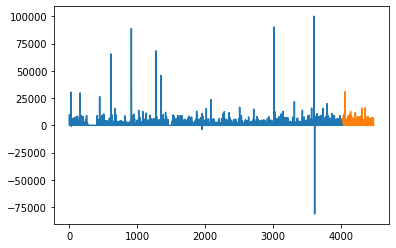

In [107]:
plt.plot(df_train['Sum_OrderQuantity']) # add training to plot
# None means take the range into account before
plt.plot([None for i in df_train['Sum_OrderQuantity']] + [x for x in df_test['Sum_OrderQuantity']]) # add testing to plot

# Create the lagged variables

In [108]:
lag_features = [
    'Sum_OrderQuantity', 'Sum_ReturnBoolean','Sum_CustomerAmount']

In [109]:
def createLagfeatures(df_input, lag_features, lag_features_amount): # backward lag shift creation

  for i in range(lag_features_amount):

    if i > 0:

      # create names for lag columns
      lag_name = "lag"+str(i)+"_"
      lag_features_renamed = []
      for feature in lag_features:
        lag_features_renamed.append(lag_name+feature )
      
      # create lagged features
      df_input[lag_features_renamed] = df_input[lag_features].shift(+i)
  return df_input

In [110]:
# Prepare training data
lag_features_amount = 15 #(is always -1) -> 14
df_train_output = createLagfeatures(df_train, lag_features, lag_features_amount)
display(df_train_output [['InvoiceDate','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])


,InvoiceDate,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
0,2009-12-01 06:00:00,226,NaN,NaN,NaN
1,2009-12-01 08:00:00,2177,226.0,NaN,NaN
2,2009-12-01 10:00:00,5756,2177.0,226.0,NaN
3,2009-12-01 12:00:00,9586,5756.0,2177.0,NaN
4,2009-12-01 14:00:00,2656,9586.0,5756.0,NaN
...,...,...,...,...,...
4030,2010-11-02 02:00:00,0,0.0,0.0,0.0
4031,2010-11-02 04:00:00,0,0.0,0.0,0.0
4032,2010-11-02 06:00:00,0,0.0,0.0,0.0
4033,2010-11-02 08:00:00,1048,0.0,0.0,0.0


In [111]:
# create target variable

df_train_output['target_OrderQuantity'] = df_train_output['Sum_OrderQuantity'].shift(-1)

display(df_train_output [['target_OrderQuantity','InvoiceDate','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])

,target_OrderQuantity,InvoiceDate,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
0,2177.0,2009-12-01 06:00:00,226,NaN,NaN,NaN
1,5756.0,2009-12-01 08:00:00,2177,226.0,NaN,NaN
2,9586.0,2009-12-01 10:00:00,5756,2177.0,226.0,NaN
3,2656.0,2009-12-01 12:00:00,9586,5756.0,2177.0,NaN
4,2609.0,2009-12-01 14:00:00,2656,9586.0,5756.0,NaN
...,...,...,...,...,...,...
4030,0.0,2010-11-02 02:00:00,0,0.0,0.0,0.0
4031,0.0,2010-11-02 04:00:00,0,0.0,0.0,0.0
4032,1048.0,2010-11-02 06:00:00,0,0.0,0.0,0.0
4033,2442.0,2010-11-02 08:00:00,1048,0.0,0.0,0.0


In [112]:

# cut off nan values created from shift
# df_train_output = df_train_output [:-lag_features_amount]
df_train_output = df_train_output [lag_features_amount:-1]
display(df_train_output [['target_OrderQuantity','InvoiceDate','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])

,target_OrderQuantity,InvoiceDate,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
15,3323.0,2009-12-02 12:00:00,6859,8508.0,4814.0,2177.0
16,6062.0,2009-12-02 14:00:00,3323,6859.0,8508.0,5756.0
17,0.0,2009-12-02 16:00:00,6062,3323.0,6859.0,9586.0
18,0.0,2009-12-02 18:00:00,0,6062.0,3323.0,2656.0
19,0.0,2009-12-02 20:00:00,0,0.0,6062.0,2609.0
...,...,...,...,...,...,...
4029,0.0,2010-11-02 00:00:00,0,0.0,0.0,0.0
4030,0.0,2010-11-02 02:00:00,0,0.0,0.0,0.0
4031,0.0,2010-11-02 04:00:00,0,0.0,0.0,0.0
4032,1048.0,2010-11-02 06:00:00,0,0.0,0.0,0.0


In [113]:
# Prepare testing data
lag_features_amount = 15 #(is always -1) -> 14
df_test_output = createLagfeatures(df_test, lag_features, lag_features_amount)
display(df_test_output [['InvoiceDate','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])


# create target variable

df_test_output['target_OrderQuantity'] = df_test_output['Sum_OrderQuantity'].shift(-1)
display(df_test_output [['InvoiceDate','target_OrderQuantity','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])


# cut off nan values created from shift
df_test_output = df_test_output [lag_features_amount:-1]
display(df_test_output [['InvoiceDate','target_OrderQuantity','Sum_OrderQuantity','lag1_Sum_OrderQuantity','lag2_Sum_OrderQuantity','lag14_Sum_OrderQuantity']])

,InvoiceDate,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
4035,2010-11-02 12:00:00,8562,NaN,NaN,NaN
4036,2010-11-02 14:00:00,2615,8562.0,NaN,NaN
4037,2010-11-02 16:00:00,7061,2615.0,8562.0,NaN
4038,2010-11-02 18:00:00,1022,7061.0,2615.0,NaN
4039,2010-11-02 20:00:00,0,1022.0,7061.0,NaN
...,...,...,...,...,...
4479,2010-12-09 12:00:00,4326,6533.0,861.0,1466.0
4480,2010-12-09 14:00:00,3510,4326.0,6533.0,4099.0
4481,2010-12-09 16:00:00,974,3510.0,4326.0,6963.0
4482,2010-12-09 18:00:00,506,974.0,3510.0,6126.0


,InvoiceDate,target_OrderQuantity,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
4035,2010-11-02 12:00:00,2615.0,8562,NaN,NaN,NaN
4036,2010-11-02 14:00:00,7061.0,2615,8562.0,NaN,NaN
4037,2010-11-02 16:00:00,1022.0,7061,2615.0,8562.0,NaN
4038,2010-11-02 18:00:00,0.0,1022,7061.0,2615.0,NaN
4039,2010-11-02 20:00:00,0.0,0,1022.0,7061.0,NaN
...,...,...,...,...,...,...
4479,2010-12-09 12:00:00,3510.0,4326,6533.0,861.0,1466.0
4480,2010-12-09 14:00:00,974.0,3510,4326.0,6533.0,4099.0
4481,2010-12-09 16:00:00,506.0,974,3510.0,4326.0,6963.0
4482,2010-12-09 18:00:00,194.0,506,974.0,3510.0,6126.0


,InvoiceDate,target_OrderQuantity,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag14_Sum_OrderQuantity
4050,2010-11-03 18:00:00,0.0,0,531.0,5286.0,2615.0
4051,2010-11-03 20:00:00,0.0,0,0.0,531.0,7061.0
4052,2010-11-03 22:00:00,0.0,0,0.0,0.0,1022.0
4053,2010-11-04 00:00:00,0.0,0,0.0,0.0,0.0
4054,2010-11-04 02:00:00,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...
4478,2010-12-09 10:00:00,4326.0,6533,861.0,0.0,0.0
4479,2010-12-09 12:00:00,3510.0,4326,6533.0,861.0,1466.0
4480,2010-12-09 14:00:00,974.0,3510,4326.0,6533.0,4099.0
4481,2010-12-09 16:00:00,506.0,974,3510.0,4326.0,6963.0


In [114]:
df_test_output.isnull().values.any()

False

In [115]:
df_train_output.isnull().values.any()

False

# Save the data

In [116]:
# save train data
df_train_output.to_csv(os.path.join(folder_OR2_data,'df_train.csv'))
df_test_output.to_csv(os.path.join(folder_OR2_data,'df_test.csv'))

# Prepare data for lstm

https://towardsdatascience.com/how-to-reshape-data-and-do-regression-for-time-series-using-lstm-133dad96cd00

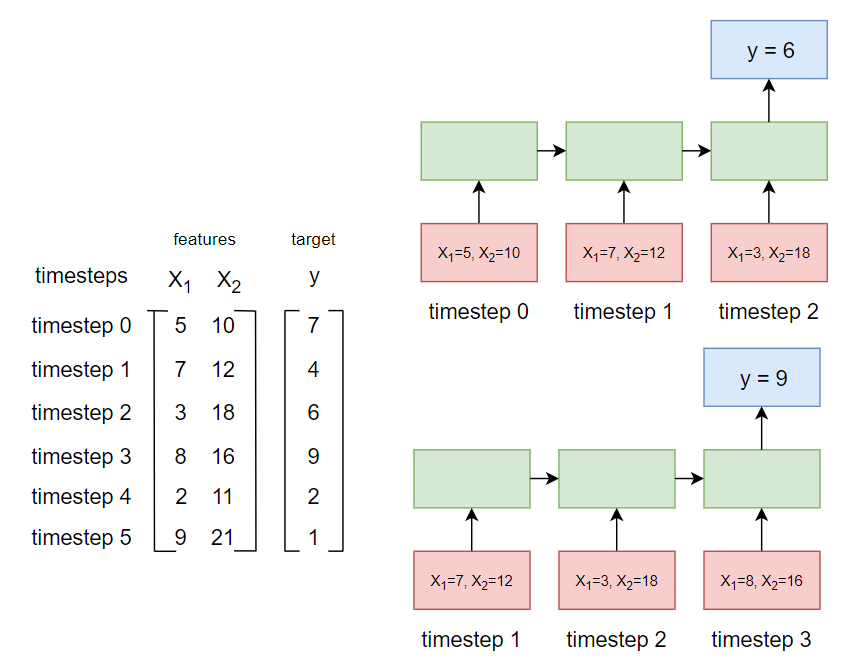

In [117]:
from IPython.display import Image
Image(filename=os.path.join(folder_OR2,'images','1_ImNjEulNPD1CYhOdEXU2BQ.png')) 


In [118]:
# save raw data as csv (X)
# because num_stepps can be seen as a hyperparameter -> use in optuna

In [119]:
X = X.replace(False, 0)
X = X.replace(True, 1)

In [120]:
X['target_OrderQuantity'] = X['Sum_OrderQuantity'].shift(-1)
X = X[:-1]

In [121]:
df_train_lstm, df_test_lstm = X[:train_size], X[train_size:]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))


Observations: 4483
Training Observations: 4035
Testing Observations: 449


In [122]:
# save train data
df_train_lstm.to_csv(os.path.join(folder_OR2_data,'df_train_lstm.csv'))
df_test_lstm.to_csv(os.path.join(folder_OR2_data,'df_test_lstm.csv'))

In [123]:
def lstm_data_transform(x_data, y_data, num_steps=14):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array


In [124]:
num_steps = 14

In [125]:
X

,InvoiceDate,Sum_OrderQuantity,Sum_ReturnBoolean,Sum_CustomerAmount,Sum_Country_Australia,Sum_Country_Austria,Sum_Country_Bahrain,Sum_Country_Belgium,Sum_Country_Brazil,Sum_Country_Canada,...,Sum_Country_United Arab Emirates,Sum_Country_United Kingdom,Sum_Country_Unspecified,Sum_Country_West Indies,InvoiceDate_weekday_Num,InvoiceDate_week_Num,InvoiceDate_month_Num,InvoiceDate_weekend_Bool,InvoiceDate_holiday,target_OrderQuantity
0,2009-12-01 06:00:00,226,0,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,0.0,1,49,12,0,0,2177.0
1,2009-12-01 08:00:00,2177,0,134,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,114.0,0.0,0.0,1,49,12,0,0,5756.0
2,2009-12-01 10:00:00,5756,35,560,18.0,0.0,0.0,1.0,0.0,0.0,...,0.0,467.0,0.0,0.0,1,49,12,0,0,9586.0
3,2009-12-01 12:00:00,9586,41,994,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,916.0,0.0,0.0,1,49,12,0,0,2656.0
4,2009-12-01 14:00:00,2656,28,326,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,247.0,0.0,0.0,1,49,12,0,0,2609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,2010-12-09 10:00:00,6533,5,306,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,221.0,0.0,0.0,3,49,12,0,0,4326.0
4479,2010-12-09 12:00:00,4326,21,568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,475.0,0.0,0.0,3,49,12,0,0,3510.0
4480,2010-12-09 14:00:00,3510,46,513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,435.0,0.0,0.0,3,49,12,0,0,974.0
4481,2010-12-09 16:00:00,974,1,183,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,183.0,0.0,0.0,3,49,12,0,0,506.0


In [126]:
# example

In [127]:
x = np.arange(0, 200, 0.5).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)
x.shape

(400, 1)

In [128]:
y.shape

(400, 1)

# own data

In [129]:
num_steps = 10
x_new, y_new = lstm_data_transform(y, y, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)


The new shape of x is (390, 10, 1)


In [130]:
y_new.shape

(390, 1)

own data

In [131]:
np.array(X.drop(['target_OrderQuantity', 'InvoiceDate'], axis=1)).shape

(4483, 45)

In [132]:
np.array(X['target_OrderQuantity']).reshape(-1, 1).shape

(4483, 1)

In [133]:
number_of_features = len(X.drop(['target_OrderQuantity', 'InvoiceDate'], axis=1).columns)

In [134]:
X_lstm, y_lstm = lstm_data_transform(np.array(X.drop(['target_OrderQuantity', 'InvoiceDate'], axis=1)), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_steps)
print ("The new shape of x is", X_lstm.shape)
print("x1=samples x2=laggs x3=features")

The new shape of x is (4473, 10, 45)
x1=samples x2=laggs x3=features


In [135]:
train_size = int(0.9 * X.shape[0])
x_train_lstm = X_lstm[:train_size]
y_train_lstm = y_lstm[:train_size]
x_test_lstm = X_lstm[train_size:]
y_test_lstm = y_lstm[train_size:]

In [136]:
y_test_lstm.shape

(439, 1)

In [137]:
model = Sequential()
model.add(LSTM(200, activation='tanh', input_shape=(num_steps, number_of_features), 
               return_sequences=False))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')

In [138]:
model.fit(x_train_lstm, y_train_lstm, epochs=40)

Epoch 1/40
127/127 [==============================] - 6s 31ms/step - loss: 16832142.0000
Epoch 2/40
127/127 [==============================] - 4s 28ms/step - loss: 16808216.0000
Epoch 3/40
127/127 [==============================] - 4s 29ms/step - loss: 16774006.0000
Epoch 4/40
127/127 [==============================] - 4s 29ms/step - loss: 16734104.0000
Epoch 5/40
127/127 [==============================] - 4s 29ms/step - loss: 16690136.0000
Epoch 6/40
127/127 [==============================] - 4s 31ms/step - loss: 16643219.0000
Epoch 7/40
127/127 [==============================] - 4s 31ms/step - loss: 16586267.0000
Epoch 8/40
127/127 [==============================] - 4s 28ms/step - loss: 16525922.0000
Epoch 9/40
127/127 [==============================] - 3s 27ms/step - loss: 16463473.0000
Epoch 10/40
127/127 [==============================] - 4s 30ms/step - loss: 16396813.0000
Epoch 11/40
127/127 [==============================] - 3s 26ms/step - loss: 16326044.0000
Epoch 12/40
127/127

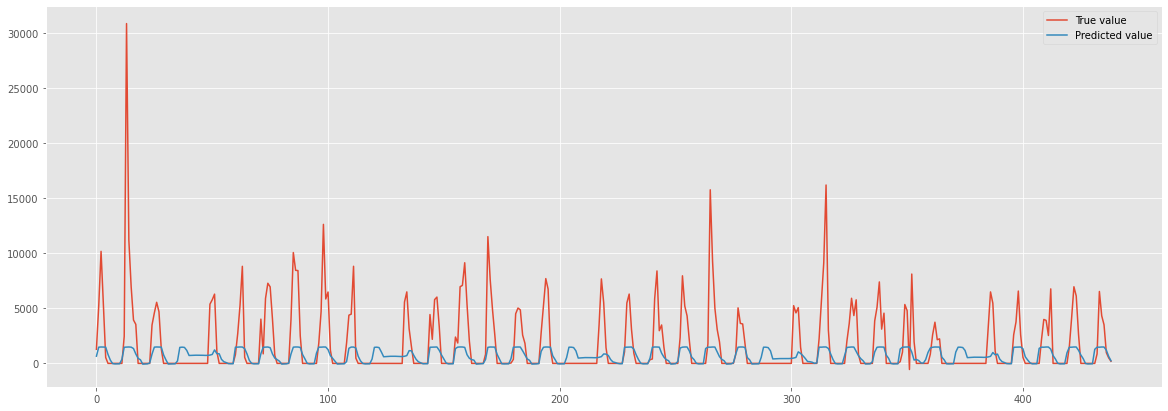

In [139]:
test_predict = model.predict(x_test_lstm)
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(y_test_lstm, label="True value")
plt.plot(test_predict.ravel(), label="Predicted value")
plt.legend()
